In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture(0)

In [3]:
images = []
for i in range(500):
    if i % 5 == 0:
        re, img = cap.read()
        images.append(img)


In [4]:
cap.release()

In [5]:
import torch
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

model_type = "vit_t"
sam_checkpoint = "../weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()
predictor = SamPredictor(mobile_sam)

# image = np.asarray(PIL.Image.open("dog.jpg").convert("RGB"))
# predictor.set_image(image)


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


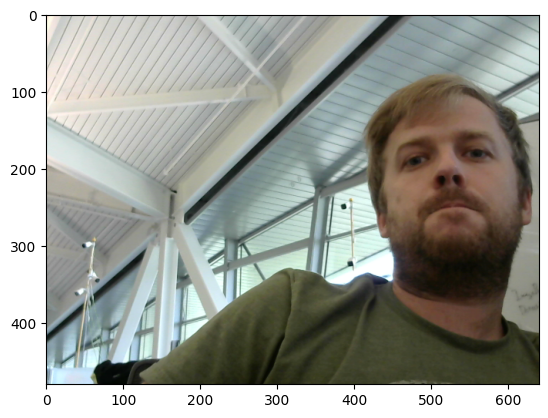

In [6]:
image = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
#x: 230, 390
#y: 250, 400

In [11]:
import tqdm
def parse_next_box(mask):
    mask_pts = np.argwhere(mask)
    min_y = np.min(mask_pts[:, 0])
    min_x = np.min(mask_pts[:, 1])
    max_y = np.max(mask_pts[:, 0])
    max_x = np.max(mask_pts[:, 1])
    next_box = np.array([min_x, min_y, max_x, max_y])
    return next_box

In [9]:
video_writer = cv2.VideoWriter('../data/person.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (640, 480))

[ERROR:0@82.410] global /opencv-4.6.0/modules/videoio/src/cap.cpp (595) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /opencv-4.6.0/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ../data/person.avi in function 'icvExtractPattern'




In [12]:
# box = np.array([[150, 275, 305, 420]])
box = np.array([400, 100, 600, 350])
masks = []
boxes = []
iter = 0
low_mask = None
for image in tqdm.tqdm(images):
    predictor.set_image(image)
    mask, iou_preds, low_mask = predictor.predict(
        box=box,
        multimask_output=True,
        mask_input=low_mask
    )
    mask_idx = np.argmax(iou_preds)
    mask = mask[mask_idx]
    low_mask = low_mask[mask_idx][None,...]
    # boxes.append(box)
    # masks.append(mask)
    box = parse_next_box(mask)
    vis_img = np.copy(image)
    vis_img[mask == 0] = 0
    video_writer.write(vis_img)
video_writer.release()

100%|██████████| 100/100 [00:05<00:00, 18.14it/s]


In [12]:
images[0][masks[0] == 0] = 0

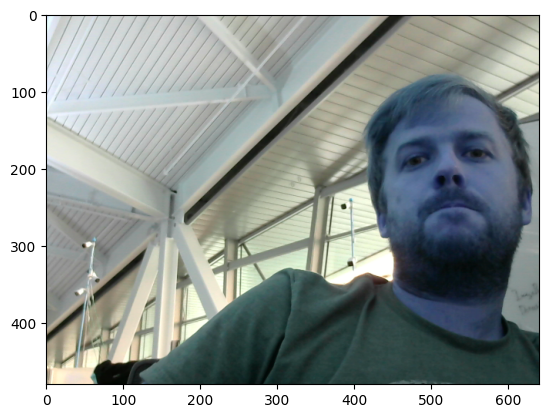

In [13]:
plt.imshow(images[0])

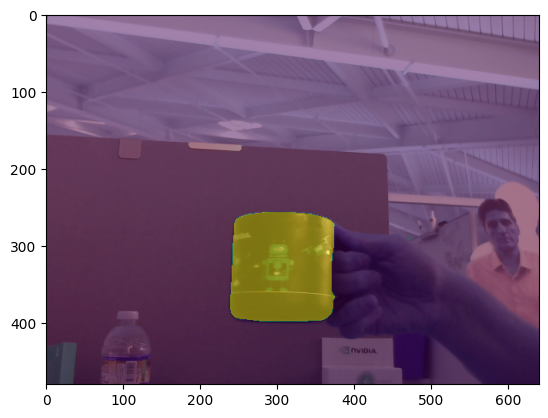

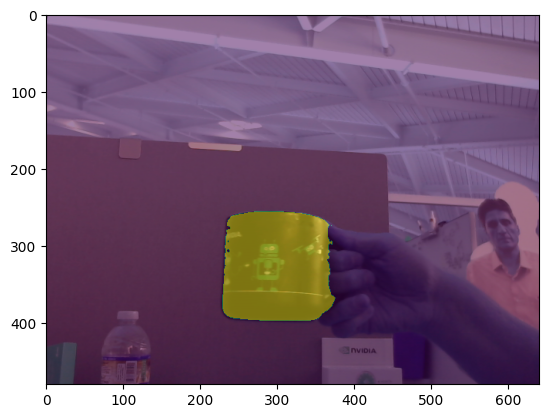

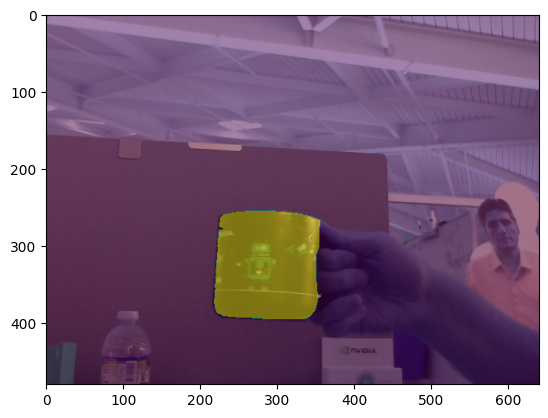

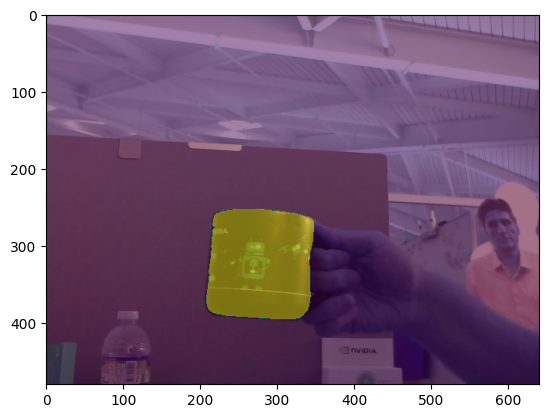

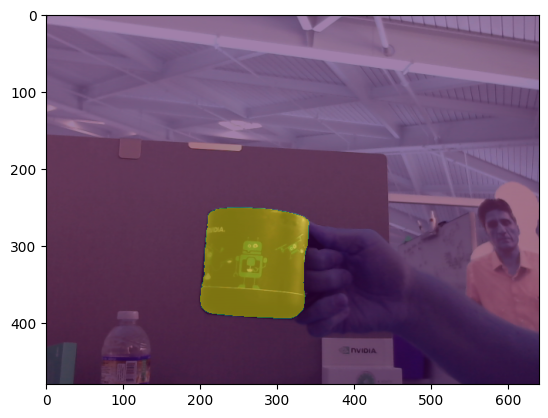

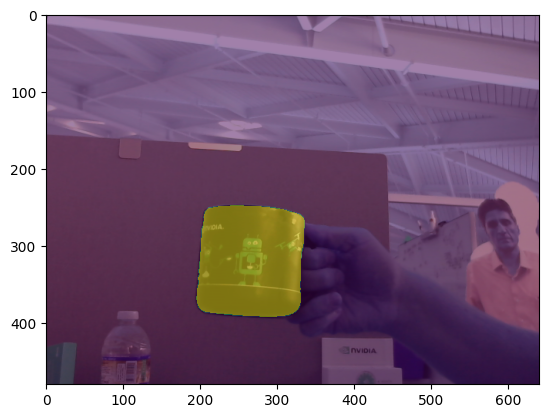

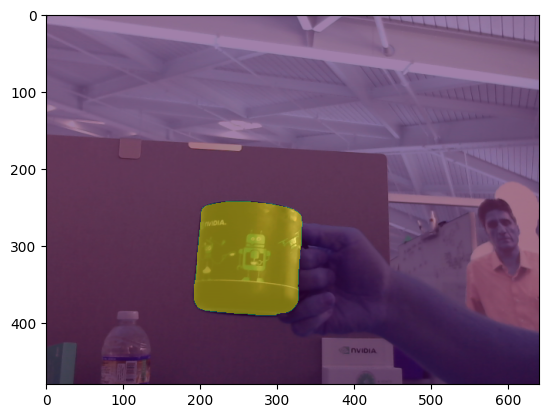

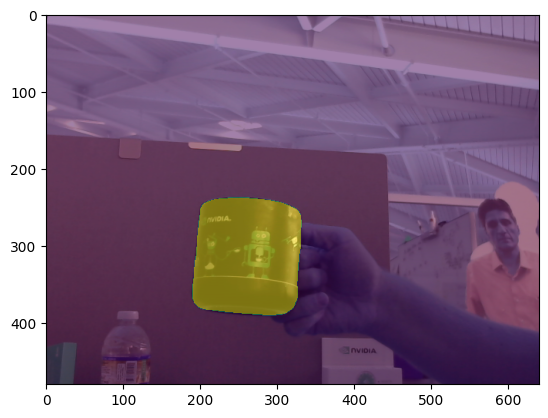

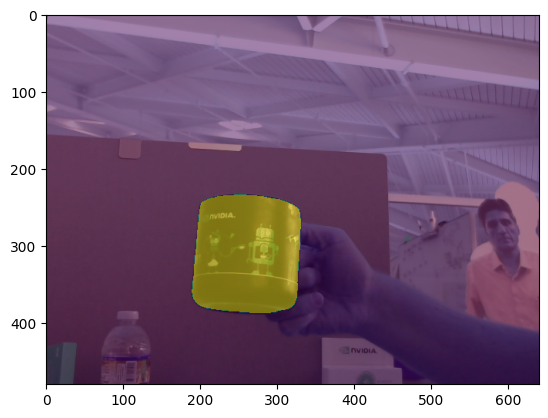

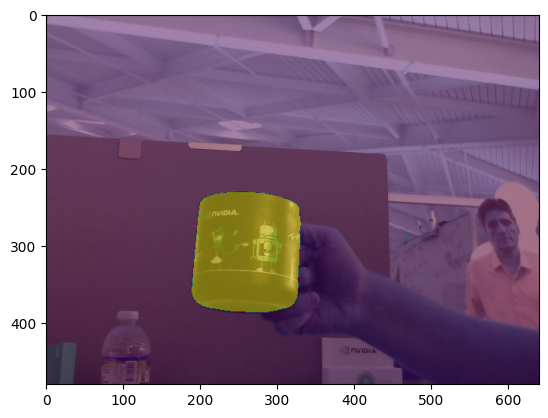

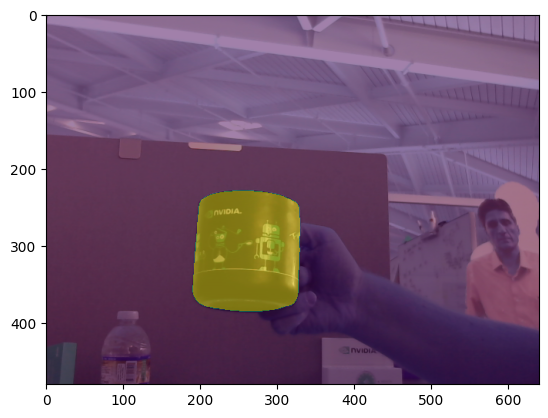

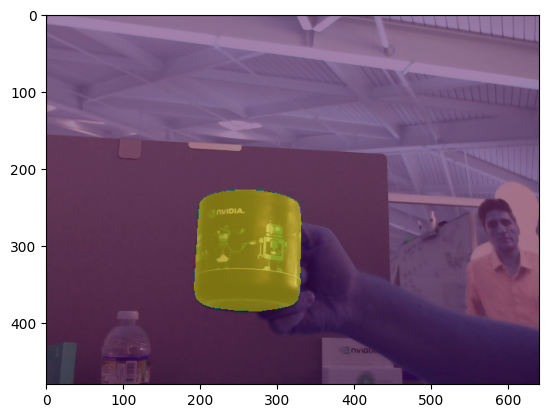

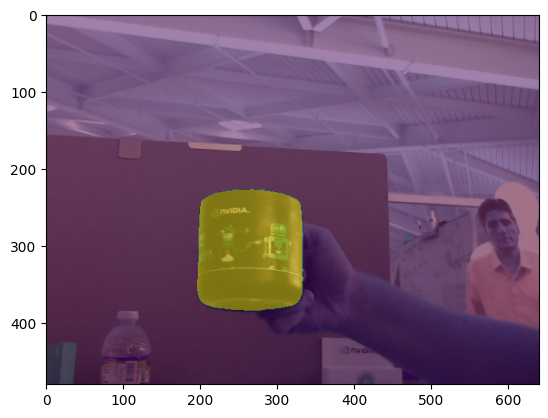

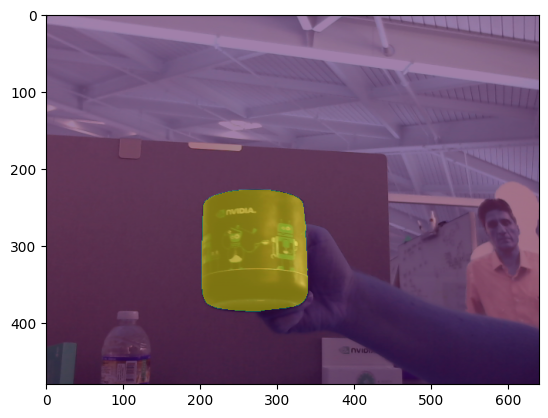

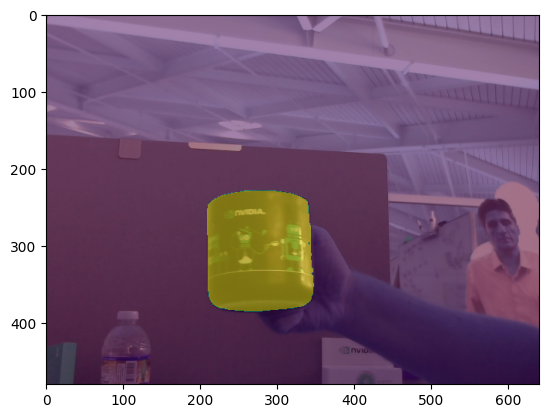

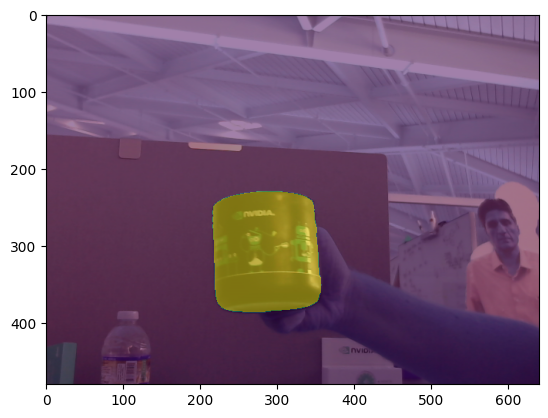

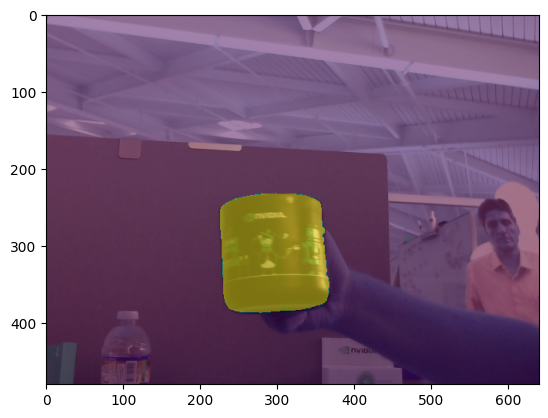

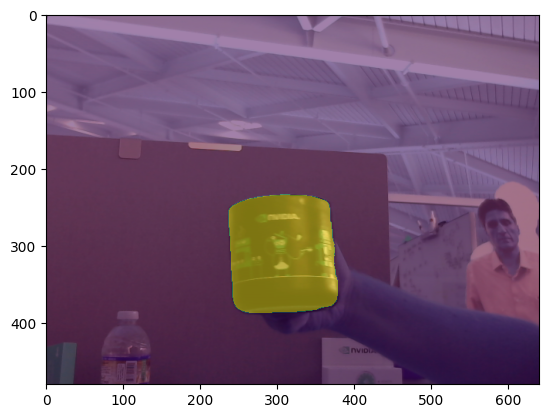

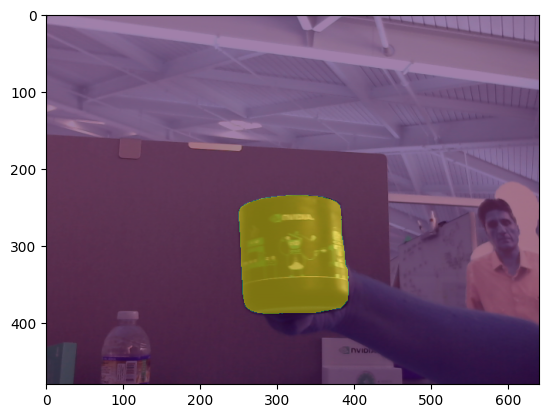

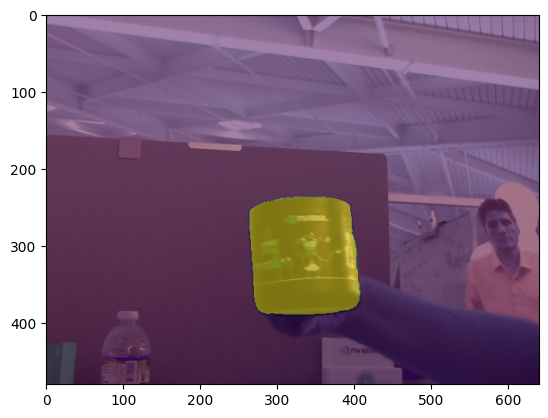

In [9]:
for im, m in zip(images[0:20], masks):
    plt.imshow(im)
    plt.imshow(m, alpha=0.5)
    plt.show()

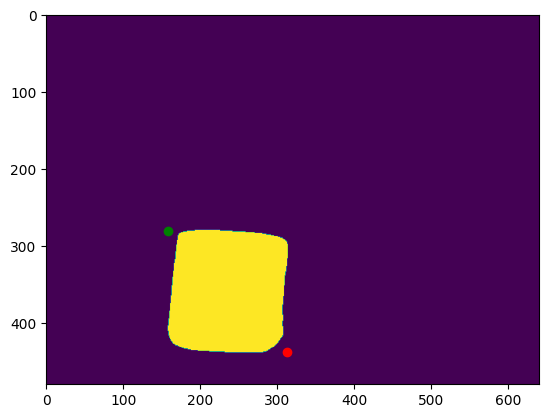

In [194]:
box = parse_next_box(mask[2])
plt.imshow(mask[2])
plt.plot(box[0], box[1], 'go')
plt.plot(box[2], box[3], 'ro')
plt.show()

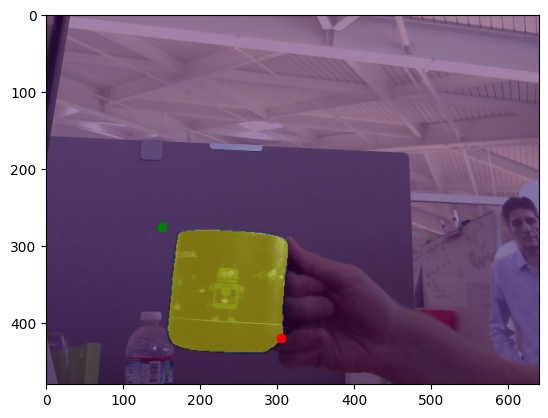

In [150]:
plt.imshow(image)
plt.plot(150, 275, 'go')
plt.plot(305, 420, 'ro')
plt.imshow(mask[2, :, :], alpha=0.5)
plt.show()